# CSE 252B: Computer Vision II, Winter 2018 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 21, 2018, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on line closest to the origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (hint: this calculation is needed in the
  two-view optimal triangulation method used below).

The normal vector for the line $\boldsymbol{l}$ is $\boldsymbol{n}^T = (a,b)$. For a point $\boldsymbol{x} = (x,y,w)^T$, any other point on the normal vector $\boldsymbol{n}$ direction could be expressed as $\boldsymbol{x'} = (x+aw,y+bw,w)^T$.

Then the line which is orthogonal to line $\boldsymbol{l}$ and through point $\boldsymbol{x}$ could be expressed as:
$$\boldsymbol{l'} = \boldsymbol{x}\times\boldsymbol{x'} = (-bw,aw,bx-ay)^T$$

Therefore, the point $\boldsymbol{x}_\boldsymbol{l}$ on line $\boldsymbol{l}$ which is closest to $\boldsymbol{x}$ is the intersection of line $\boldsymbol{l}$ and line $\boldsymbol{l'}$. And it could be calculated as:
$$\boldsymbol{x}_\boldsymbol{l} = \boldsymbol{l}\times\boldsymbol{l'} = \left[
 \begin{array}{c}
   b^2x-aby-acw \\
   a^2y-abx-bcw \\
   (a^2+b^2)w \\
 \end{array}
\right]$$

Thus, if $\boldsymbol{x} = (0,0,1)^T$ which is the origin, the point on $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x}_\boldsymbol{l} = (-ac, -bc, a^2+b^2)^\top$

## Programing
Download input data from the course website. The file IMG_5030.JPG contains image 1 and the file IMG_5031.JPG contains image 2.

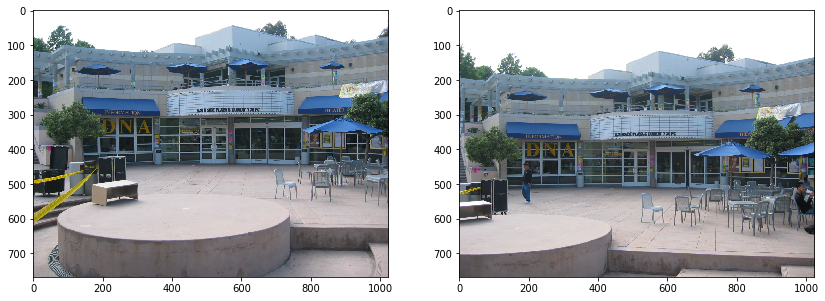

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# open the input images
I1 = np.array(Image.open('IMG_5030.JPG'), dtype='float')/255.
I2 = np.array(Image.open('IMG_5031.JPG'), dtype='float')/255.

# Display the input images
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(I1)
plt.subplot(1,2,2)
plt.imshow(I2)
plt.show()

## Problem 2 (Programing): Feature Detection (20 points)
For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
around 1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

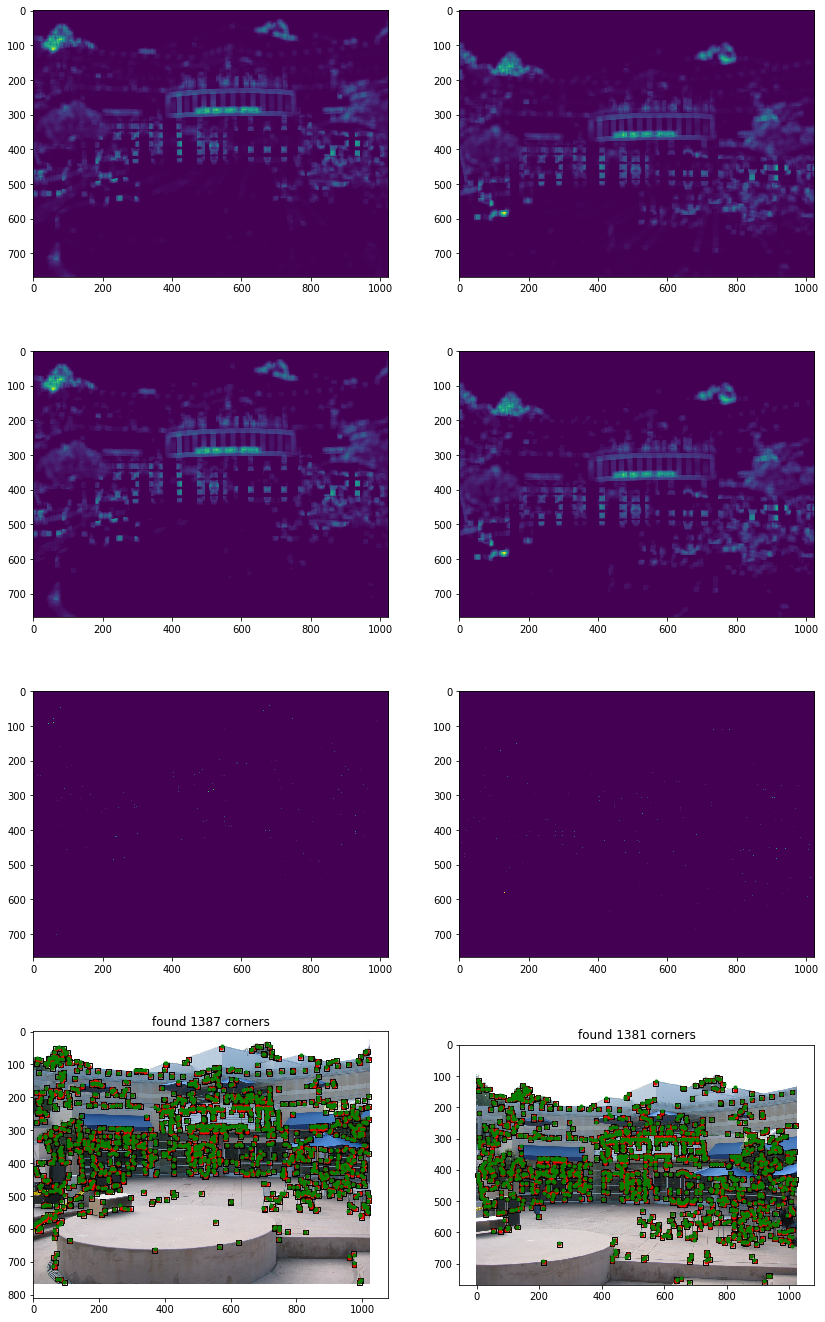

In [17]:
from scipy import signal
from scipy import ndimage

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def corner(I, w, t, w_nms):
    # inputs: 
    # I is the input image (may be mxn for BW or mxnx3 for RGB)
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the window used for nonmaximal supression
    # outputs:
    # J0 is the mxn image of minor eigenvalues of N before thresholding
    # J1 is the mxn image of minor eigenvalues of N after thresholding
    # J2 is the mxn image of minor eigenvalues of N after nonmaximal supression
    # pts0 is the 2xk list of coordinates of (pixel accurate) corners
    #     (ie. coordinates of nonzero values of J2)
    # pts1 is the 2xk list of coordinates of subpixel accurate corners
    #     found using the Forstner detector
    
    """your code here"""
    m,n = I.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))
    J2 = np.zeros((m,n))
    Ix = np.zeros((m,n))
    Iy = np.zeros((m,n))
    
    I_gray = rgb2gray(I)
    gradient_kernel = 1.0/12*np.array([-1,8,0,-8,1])
    for i in range(m):
        Ix[i,:] = ndimage.convolve(I_gray[i,:],gradient_kernel, mode='reflect')
    for i in range(n):
        Iy[:,i] = np.transpose(ndimage.convolve(I_gray[:,i].T,gradient_kernel,mode='reflect'))
    
    Ixx = np.multiply(Ix,Ix)
    Ixy = np.multiply(Ix,Iy)
    Iyy = np.multiply(Iy,Iy)
    
    xIxx = np.zeros((m,n))
    yIyy = np.zeros((m,n))
    xIxy = np.zeros((m,n))
    yIxy = np.zeros((m,n))
    for i in range(m):
        xIxx[i,:] = i*Ixx[i,:]
        xIxy[i,:] = i*Ixy[i,:]
    for i in range(n):
        yIyy[:,i] = i*Iyy[:,i]
        yIxy[:,i] = i*Ixy[:,i]
        
    sum_kernel = np.ones((w,w))
    sum_w_Ixx = signal.convolve2d(Ixx,sum_kernel,'same','symm')
    sum_w_Ixy = signal.convolve2d(Ixy,sum_kernel,'same','symm')
    sum_w_Iyy = signal.convolve2d(Iyy,sum_kernel,'same','symm')
    sum_w_xIxx = signal.convolve2d(xIxx,sum_kernel,'same','symm')
    sum_w_xIxy = signal.convolve2d(xIxy,sum_kernel,'same','symm')
    sum_w_yIxy = signal.convolve2d(yIxy,sum_kernel,'same','symm')
    sum_w_yIyy = signal.convolve2d(yIyy,sum_kernel,'same','symm')
    
    det_N = sum_w_Ixx*sum_w_Iyy - sum_w_Ixy*sum_w_Ixy
    Tr_N = sum_w_Ixx+sum_w_Iyy
    for i in range(m):
        for j in range(n):
            if Tr_N[i,j]*Tr_N[i,j]-4*det_N[i,j]>=0:
                J0[i,j] = 1.0/2*(Tr_N[i,j]-np.sqrt(Tr_N[i,j]*Tr_N[i,j]-4*det_N[i,j]))
            else:
                J0[i,j] = 0
    for i in range(m):
        for j in range(n):
            if J0[i,j]<t: 
                J1[i,j] = 0
            else:
                J1[i,j] = J0[i,j]
    
    half_w_nms = int((w_nms-1)/2.0)
    for i in range(half_w_nms,m-half_w_nms):
        for j in range(half_w_nms,n-half_w_nms):
            window = J1[i-half_w_nms:i+half_w_nms,j-half_w_nms:j+half_w_nms]
            local_max = np.amax(window)
            if J1[i,j]==local_max:
                J2[i,j]=J1[i,j]
                
    pts0_x = []
    pts0_y = []
    pts1_x = []
    pts1_y = []
    for i in range(m):
        for j in range(n):
            if J2[i,j]!=0:
                pts0_x.append(j)
                pts0_y.append(i)
                A = np.array(([sum_w_Ixx[i,j],sum_w_Ixy[i,j]],
                             [sum_w_Ixy[i,j],sum_w_Iyy[i,j]]))
                b = np.array(([sum_w_xIxx[i,j]+sum_w_yIxy[i,j]],\
                              [sum_w_xIxy[i,j]+sum_w_yIyy[i,j]]))
                x = np.dot(np.linalg.inv(A),b)
                pts1_x.append(int(x[1]))
                pts1_y.append(int(x[0]))
                
    pts0 = np.array([pts0_x,pts0_y])
    pts1 = np.array([pts1_x,pts1_y])
    return J0, J1, J2, pts0, pts1


# parameters to tune
w=15
t=0.10
w_nms=7

# extract corners
J1_0, J1_1, J1_2, pts1_0, pts1_1 = corner(I1, w, t, w_nms)
J2_0, J2_1, J2_2, pts2_0, pts2_1 = corner(I2, w, t, w_nms)

# Display results
plt.figure(figsize=(14,24))

# show pre-thresholded corner heat map
plt.subplot(4,2,1)
plt.imshow(J1_0)
plt.subplot(4,2,2)
plt.imshow(J2_0)

# show thresholded corner heat map
plt.subplot(4,2,3)
plt.imshow(J1_1)
plt.subplot(4,2,4)
plt.imshow(J2_1)

# show corner heat map after nonmaximal supression
plt.subplot(4,2,5)
plt.imshow(J1_2)
plt.subplot(4,2,6)
plt.imshow(J2_2)

# show corners on origional images
ax = plt.subplot(4,2,7)
plt.imshow(I1)
# draw rectangles of size w around corners
for i in range(pts1_0.shape[1]):
    x,y = pts1_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts1_0[0,:], pts1_0[1,:], '.r') # display pixel accurate corners
plt.plot(pts1_1[0,:], pts1_1[1,:], '.g') # display subpixel corners
plt.title('found %d corners'%pts1_0.shape[1])
ax = plt.subplot(4,2,8)
plt.imshow(I2)
for i in range(pts2_0.shape[1]):
    x,y = pts2_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts2_0[0,:], pts2_0[1,:], '.r')
plt.plot(pts2_1[0,:], pts2_1[1,:], '.g')
plt.title('found %d corners'%pts2_0.shape[1])

plt.show()

## Problem 3 (Programing): Feature Matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that around 300 putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

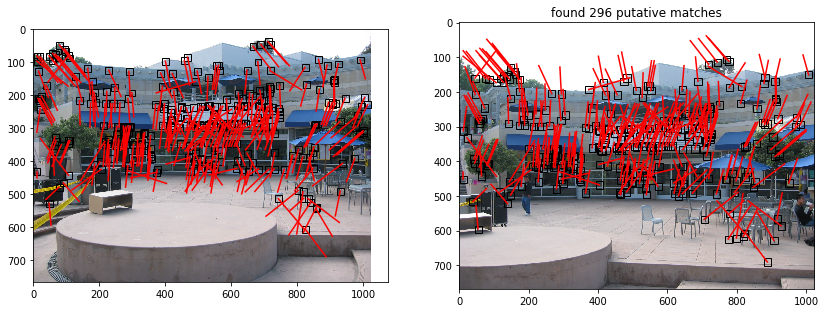

In [18]:
import math

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = np.array(a - mean2(a))
    b = np.array(b - mean2(b))

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

def match(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the proximity threshold
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    # scores is a vector of length k that contains the correlation
    #     coefficients of the matches
    
    """your code here"""
    I1_gray = rgb2gray(I1)
    I2_gray = rgb2gray(I2)
    m,n = I1.shape[:2]
    
    corr_m = np.zeros((pts1.shape[1],pts2.shape[1]))
    for i in range(pts1.shape[1]):
        for j in range(pts2.shape[1]):
            xmin1 = int(pts1[1,i]-(w-1)/2)
            ymin1 = int(pts1[0,i]-(w-1)/2)
            xmax1 = int(pts1[1,i]+(w-1)/2)
            ymax1 = int(pts1[0,i]+(w-1)/2)
            xmin2 = int(pts2[1,j]-(w-1)/2)
            ymin2 = int(pts2[0,j]-(w-1)/2)
            xmax2 = int(pts2[1,j]+(w-1)/2)
            ymax2 = int(pts2[0,j]+(w-1)/2)
            if xmin1<0 or ymin1<0 or xmin2<0 or ymin2<0: 
                corr_m[i,j] = -1
            elif xmax1>m or xmax2>m or ymax1>n or ymax2>n: 
                corr_m[i,j] = -1
            else:
                corr_m[i,j] = corr2(I1_gray[xmin1:xmax1,ymin1:ymax1],\
                                    I2_gray[xmin2:xmax2,ymin2:ymax2])
            
    mask = np.ones((pts1.shape[1],pts2.shape[1]))
    
    pair1 = []
    pair2 = []
    scores = []
    temp_corr_m = np.multiply(mask,corr_m)
    while t<np.max(temp_corr_m):
        max_index = np.argmax(temp_corr_m)
        max_corr = np.max(temp_corr_m)
        row = int(max_index/pts2.shape[1])
        col = int(max_index%pts2.shape[1])
        corr_m[row,col] = -1
        max_next = max([corr_m[row,:].max(),corr_m[:,col].max()])
        corr_m[row,col] = max_corr
        if (1-corr_m[row,col])<((1-max_next)*d):
            if math.sqrt(np.square(pts1[0,row]-pts2[0,col])+np.square(pts1[1,row]-pts2[1,col]))<p:
                pair1.append(row)
                pair2.append(col)
                scores.append(corr_m[row,col])
        mask[row,:] = np.zeros((1,pts2.shape[1]))
        mask[:,col] = np.zeros((1,pts1.shape[1]))
        temp_corr_m = np.multiply(mask,temp_corr_m)
    
    inds = np.array([pair1,pair2])
    scores = np.array(scores)
    
    return inds, scores

# parameters to tune
w1 = 21
t1 = 0.3
d1 = 1.0
p1 = 140

# do the matching
inds, scores = match(I1, I2, pts1_1, pts2_1, w1, t1, d1, p1)

# create new arays of points which are correspoinding
pts1 = pts1_1[:,inds[0,:]]
pts2 = pts2_1[:,inds[1,:]]

# display the results
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
plt.title('found %d putative matches'%inds.shape[1])
ax2.imshow(I2)
for i in range(inds.shape[1]):
    ii = inds[0,i]
    jj = inds[1,i]
    x1 = pts1_1[0,ii]
    x2 = pts2_1[0,jj]
    y1 = pts1_1[1,ii]
    y2 = pts2_1[1,jj]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w1/2,y1-w1/2),w1,w1, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w1/2,y2-w1/2),w1,w1, fill=False))
plt.show()
#print(scores)

## Problem 4 (Programing): Outlier Rejection (15 points)
  The resulting set of putative point correspondences should contain
  both inlier and outlier correspondences (i.e., false matches).
  Determine the set of inlier point correspondences using the
  M-estimator Sample Consensus (MSAC) algorithm, where the maximum
  number of attempts to find a consensus set is determined adaptively.
  For each trial, you must use the 7-point algorithm (as described in class) to estimate the
  fundamental matrix, resulting in 1 or 3 solutions.  Calculate the
  (squared) Sampson error as a first order approximation to the
  geometric error.

  hint: this problem has codimension 1.

('inliers: ', [1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 32, 33, 34, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 81, 83, 84, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 130, 131, 132, 133, 135, 136, 138, 139, 141, 142, 143, 144, 146, 149, 151, 153, 154, 156, 157, 158, 159, 161, 162, 163, 164, 165, 167, 168, 169, 170, 174, 175, 176, 178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 192, 194, 195, 198, 199, 200, 202, 204, 206, 209, 210, 211, 212, 213, 215, 216, 217, 220, 224, 225, 226, 227, 228, 229, 230, 231, 233, 237, 239, 241, 242, 243, 245, 246, 249, 250, 251, 252, 253, 255, 258, 262, 263, 267, 268, 269, 271, 274, 275, 277, 279, 280, 281, 282, 283, 284, 285, 286, 289, 290, 291, 292, 293, 294, 295])
('inlier count: ', 207)
cost_MS

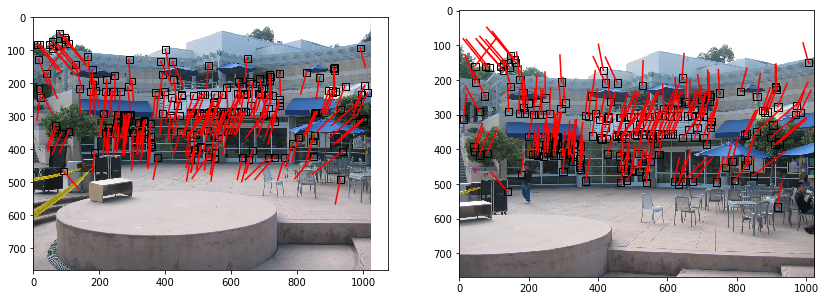

In [24]:
import random

def toHomo(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))
def fromHomo(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return 1.0*x[:-1,:]/x[-1,:]
def Normalize(x):
    mu = np.mean(x,axis=1)
    var = np.sum(np.var(x,axis=1))
    s = np.sqrt((x.shape[0]+0.0)/var)
    H = np.zeros((x.shape[0]+1,x.shape[0]+1))
    for i in range(x.shape[0]):
        H[i,i] = s
        H[i,x.shape[0]] = -mu[i]*s
    H[x.shape[0],x.shape[0]] = 1
    x_homo = toHomo(x)
    x_normalized_homo = np.dot(H,x_homo)
    return (x_normalized_homo,H)

def nullspace(A):
    u, s, vh = np.linalg.svd(A)
    ns = vh[-2:,:].T
    return ns

def get_F(pts1, pts2, choice):
    a1 = np.kron(toHomo(pts2[:,choice[0]].reshape(2,1)).T,toHomo(pts1[:,choice[0]].reshape(2,1)).T)
    a2 = np.kron(toHomo(pts2[:,choice[1]].reshape(2,1)).T,toHomo(pts1[:,choice[1]].reshape(2,1)).T)
    a3 = np.kron(toHomo(pts2[:,choice[2]].reshape(2,1)).T,toHomo(pts1[:,choice[2]].reshape(2,1)).T)
    a4 = np.kron(toHomo(pts2[:,choice[3]].reshape(2,1)).T,toHomo(pts1[:,choice[3]].reshape(2,1)).T)
    a5 = np.kron(toHomo(pts2[:,choice[4]].reshape(2,1)).T,toHomo(pts1[:,choice[4]].reshape(2,1)).T)
    a6 = np.kron(toHomo(pts2[:,choice[5]].reshape(2,1)).T,toHomo(pts1[:,choice[5]].reshape(2,1)).T)
    a7 = np.kron(toHomo(pts2[:,choice[6]].reshape(2,1)).T,toHomo(pts1[:,choice[6]].reshape(2,1)).T)
    
    A = np.vstack((a1,a2,a3,a4,a5,a6,a7))
    ns = nullspace(A)
    F1 = ns[:,0].reshape(3,3)
    F2 = ns[:,1].reshape(3,3)
    G = ns[0,0]*ns[4,0]*ns[8,0] \
    - ns[0,0]*ns[5,0]*ns[7,0] \
    - ns[1,0]*ns[3,0]*ns[8,0] \
    + ns[1,0]*ns[5,0]*ns[6,0] \
    + ns[2,0]*ns[3,0]*ns[7,0] \
    - ns[2,0]*ns[4,0]*ns[6,0]
    H = ns[0,0]*ns[4,0]*ns[8,1] \
    - ns[0,0]*ns[5,0]*ns[7,1] \
    - ns[0,0]*ns[7,0]*ns[5,1] \
    + ns[0,0]*ns[8,0]*ns[4,1] \
    - ns[1,0]*ns[3,0]*ns[8,1] \
    + ns[1,0]*ns[5,0]*ns[6,1] \
    + ns[1,0]*ns[6,0]*ns[5,1] \
    - ns[1,0]*ns[8,0]*ns[3,1] \
    + ns[2,0]*ns[3,0]*ns[7,1] \
    - ns[2,0]*ns[4,0]*ns[6,1] \
    - ns[2,0]*ns[6,0]*ns[4,1] \
    + ns[2,0]*ns[7,0]*ns[3,1] \
    + ns[3,0]*ns[7,0]*ns[2,1] \
    - ns[3,0]*ns[8,0]*ns[1,1] \
    - ns[4,0]*ns[6,0]*ns[2,1] \
    + ns[4,0]*ns[8,0]*ns[0,1] \
    + ns[5,0]*ns[6,0]*ns[1,1] \
    - ns[5,0]*ns[7,0]*ns[0,1]
    I = ns[0,0]*ns[4,1]*ns[8,1] \
    - ns[0,0]*ns[5,1]*ns[7,1] \
    - ns[1,0]*ns[3,1]*ns[8,1] \
    + ns[1,0]*ns[5,1]*ns[6,1] \
    + ns[2,0]*ns[3,1]*ns[7,1] \
    - ns[2,0]*ns[4,1]*ns[6,1] \
    - ns[3,0]*ns[1,1]*ns[8,1] \
    + ns[3,0]*ns[2,1]*ns[7,1] \
    + ns[4,0]*ns[0,1]*ns[8,1] \
    - ns[4,0]*ns[2,1]*ns[6,1] \
    - ns[5,0]*ns[0,1]*ns[7,1] \
    + ns[5,0]*ns[1,1]*ns[6,1] \
    + ns[6,0]*ns[1,1]*ns[5,1] \
    - ns[6,0]*ns[2,1]*ns[4,1] \
    - ns[7,0]*ns[0,1]*ns[5,1] \
    + ns[7,0]*ns[2,1]*ns[3,1] \
    + ns[8,0]*ns[0,1]*ns[4,1] \
    - ns[8,0]*ns[1,1]*ns[3,1]
    J = ns[0,1]*ns[4,1]*ns[8,1] \
    - ns[0,1]*ns[5,1]*ns[7,1] \
    - ns[1,1]*ns[3,1]*ns[8,1] \
    + ns[1,1]*ns[5,1]*ns[6,1] \
    + ns[2,1]*ns[3,1]*ns[7,1] \
    - ns[2,1]*ns[4,1]*ns[6,1]
    alpha = np.roots(np.array([G,H,I,J]).reshape(4))
    alpha = np.real(alpha[np.isreal(alpha)])
    
    F = []
    for alpha_t in alpha:
        F.append(alpha_t*F1+F2)
    return F

def Sampson_error(pts1, pts2, F):
    error_vec = []
    Sampson_vec = []
    for i in range(pts1.shape[1]):
        x1 = pts1[0,i]
        x2 = pts2[0,i]
        y1 = pts1[1,i]
        y2 = pts2[1,i]
        
        A = np.kron(toHomo(pts2[:,i].reshape(2,1)).T,\
                    toHomo(pts1[:,i].reshape(2,1)).T)
        f = np.vstack((F[0,:].reshape(3,1),F[1,:].reshape(3,1),F[2,:].reshape(3,1)))
        epsil = A.dot(f)
        J = np.array([x2*F[0,0]+y2*F[1,0]+F[2,0],\
                      x2*F[0,1]+y2*F[1,1]+F[2,1],\
                      x1*F[0,0]+y1*F[0,1]+F[0,2],\
                      x1*F[1,0]+y1*F[1,1]+F[1,2]]).reshape(1,-1)
        lambda_s = -1.0*epsil/(J.dot(J.T))
        delta = J.T*lambda_s
        Sampson_vec.append(delta)
        error = delta.T.dot(delta)
        error_vec.append(error)
    return error_vec,np.array(Sampson_vec).reshape(pts1.shape[1],delta.shape[0]).T

def consensus_cost(error,t,record=False):
    cost = 0
    num_inlier = 0
    inliers = []
    for i in range(len(error)):
        if error[i]<=t:
            cost = cost+error[i]
            num_inlier = num_inlier+1
            if record:
                inliers.append(i)
        else:
            cost = cost+t
    return cost,num_inlier,inliers

def MSAC(pts1, pts2, max_iters):
    """your code here"""
    
    consensus_Mincost = np.inf
    # when alpha=0.95 codimension=1
    distance_threshold = 3.8415
    trials = 0
    
    while trials < max_iters:
        choice = random.sample(range(pts1.shape[1]),7)
        F = get_F(pts1, pts2, choice)
        for F_t in F:
            error,Sampson_vec = Sampson_error(pts1, pts2, F_t)
            cost,num_inlier,inliers = consensus_cost(error,distance_threshold)
            if cost<consensus_Mincost:
                consensus_Mincost = cost
                F_best = F_t

                s = 7 #sample size
                p = 0.99
                w = 1.0*num_inlier/pts1.shape[1]
                if w>0:
                    max_iters = np.log(1-p)/np.log(1-w**s)  
            trials = trials+1
    
    error,Sampson_vec = Sampson_error(pts1, pts2, F_best)
    cost,num_inlier,inliers = consensus_cost(error,distance_threshold,record=True)
    iters = trials # number of MSAC itterations executed
    return 1.0*F_best/np.sqrt(np.sum(F_best**2)), inliers, cost, iters

# MSAC hyperparameters (add any additional hyperparameters necessary here. For example p)
# You should pass these hyperparameters as additional paramters to MSAC(...)
max_iters=1

F_MSAC, inliers, cost_MSAC, iters_MSAC = MSAC(pts1, pts2, max_iters)
print('inliers: ', inliers)
print('inlier count: ', len(inliers))

print('cost_MSAC=%f'%cost_MSAC)
print('||F_MSAC||=%f'%np.sqrt(np.sum(F_MSAC**2)))
print('F_MSAC')
print(F_MSAC/np.sqrt(np.sum(F_MSAC**2)))

# display the results
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
for i in range(inds[:,inliers].shape[1]):
    ii = inds[0,inliers[i]]
    jj = inds[1,inliers[i]]
    x1 = pts1_1[0,ii]
    x2 = pts2_1[0,jj]
    y1 = pts1_1[1,ii]
    y2 = pts2_1[1,jj]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w1/2,y1-w1/2),w1,w1, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w1/2,y2-w1/2),w1,w1, fill=False))
plt.show()

## Problem 5 (Programing): Linear Estimate (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [25]:
def sinc(x):
    if x == 0:
        return 1
    else:
        return np.sin(x) / x
    
def sinc_prime(x):
    if x == 0:
        return 0
    else:
        return np.cos(x)/x-np.sin(x)/(x**2)
    
def Parameterization(v):
    v = v/np.linalg.norm(v)
    a = v[0,0]
    b = v[1:]
    v_i = 2.0/sinc(np.arccos(a))*b
    
    if np.linalg.norm(v_i)>np.pi:
        v_i = (1-2.0*np.pi/np.linalg.norm(v_i)*np.ceil((np.linalg.norm(v_i)-np.pi)/(2.0*np.pi)))*v_i
    return v_i.reshape(b.shape[0],1)

def Deparameterization(v):
    if np.linalg.norm(v)>np.pi:
        v = (1-2.0*np.pi/np.linalg.norm(v)*np.ceil((np.linalg.norm(v)-np.pi)/(2.0*np.pi)))*v
    a = np.cos(np.linalg.norm(v)/2.0)
    b = sinc(np.linalg.norm(v)/2.0)/2.0*v
    return np.vstack((a,b))

def ProjTransfer(x,P):
    return fromHomo(P.dot(toHomo(x)))

def DLT(pts1, pts2):
    """your code here"""
    pts1_normalized_homo,T = Normalize(pts1)
    pts2_normalized_homo,U = Normalize(pts2)
    pts1_normalized = fromHomo(pts1_normalized_homo)
    pts2_normalized = fromHomo(pts2_normalized_homo)
    
    A = np.zeros((1,9))
    for i in range(pts1.shape[1]):
        A = np.vstack((A,np.kron(toHomo(pts2_normalized[:,i].reshape(2,1)).T,\
                                 toHomo(pts1_normalized[:,i].reshape(2,1)).T)))
    U_svd, s, V = np.linalg.svd(A[1:,:], full_matrices=False)
    F = np.array([V[8,0:3],V[8,3:6],V[8,6:]])
    U_svd, s, V = np.linalg.svd(F, full_matrices=False)
    s[2] = 0
    F = U_svd.dot(np.diag(s)).dot(V)
    F = U.T.dot(F).dot(T)
    
    
    error,Sampson_vec = Sampson_error(pts1, pts2, F)
    cost,num_inlier,inliers = consensus_cost(error,3.8415)
    return F/np.sqrt(np.sum(F**2)), cost

F_DLT, cost_DLT = DLT(pts1[:,inliers], pts2[:,inliers])
print('cost_DLT=%f'%cost_DLT)
print('||F_DLT||=%f'%np.sqrt(np.sum(F_DLT**2)))
print('F_DLT')
print(F_DLT/np.sqrt(np.sum(F_DLT**2)))

cost_DLT=104.567472
||F_DLT||=1.000000
F_DLT
[[  1.70338859e-09  -1.30028266e-06   3.65601296e-04]
 [  6.49237665e-08   3.31023174e-07   1.12445320e-02]
 [ -9.06714528e-06  -1.06266806e-02  -9.99880243e-01]]


## Problem 6 (Programing): Nonlinear Estimate (55 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors
  (see section A6.9.2 (page 624) of the textbook, and the corrections
  and errata).

  Show the initial cost (i.e., the cost at iteration 0) and the cost at the end of each successive iteration. 
  Make sure to display with sufficient precision that we can see the error decrease (at least during the first step).

In [26]:
def get_P_from_F(F):
    W = np.zeros((3,3))
    Z = np.zeros((3,3))
    W[0,1] = 1
    W[1,0] = -1
    Z[0,1] = -1
    Z[1,0] = 1
    Z[2,2] = 1
    
    U, D, V = np.linalg.svd(F, full_matrices=False)
    D[2] = (D[0]+D[1])/2.0
    S = U.dot(W).dot(U.T)
    m = U.dot(Z).dot(np.diag(D)).dot(V)
    e = np.zeros((3,1))
    e[0,0] = S[2,1]
    e[1,0] = S[0,2]
    e[2,0] = S[1,0]
    return np.hstack((m,e))

def get_F_from_P(P):
    m = P[:,:3]
    e = P[:,3].reshape(3,1)
    e_x = np.zeros((3,3))
    e_x[0,1] = -e[2,0]
    e_x[1,0] = e[2,0]
    e_x[0,2] = e[1,0]
    e_x[2,0] = -e[1,0]
    e_x[1,2] = -e[0,0]
    e_x[2,1] = e[0,0]
    F = e_x.dot(m)
    return F

def getepipole(F):
    U, D, V = np.linalg.svd(F, full_matrices=False)
    e = V[-1,:].reshape(3,1)
    U, D, V = np.linalg.svd(F.T, full_matrices=False)
    e_prime = V[-1,:].reshape(3,1)
    
    e = 1.0/np.sqrt(e[0,0]**2+e[1,0]**2)*e
    e_prime = 1.0/np.sqrt(e_prime[0,0]**2+e_prime[1,0]**2)*e_prime
    return e, e_prime

def select_t(t,a,b,c,d,f,f_prime):
    t_best = 0
    cost_best = np.inf
    for tt in t:
        cost = tt**2/(1.0+f**2*tt**2)+(c*tt+d)**2/((a*tt+b)**2+f_prime**2*(c*tt+d)**2)
        if cost<cost_best:
            cost_best = cost
            t_best = tt
    cost = 1.0/(f**2)+c**2/(a**2+f_prime**2*c**2)
    if cost<cost_best:
        cost_best = cost
        t_best = np.inf
    return t_best

def correct_pts(a,b,c,d,f,f_prime):
    G = -a*c*np.power(f,4)*(a*d - b*c)
    H = (a**2 + c**2*f_prime**2)**2 - a*d*np.power(f,4)*(a*d - b*c) - b*c*np.power(f,4)*(a*d - b*c)
    I = 2*(a**2 + c**2*f_prime**2)*(2*c*d*f_prime**2 + 2*a*b) - 2*a*c*f**2*(a*d - b*c) - b*d*np.power(f,4)*(a*d - b*c)
    J = 2*(a**2 + c**2*f_prime**2)*(b**2 + d**2*f_prime**2) + (2*c*d*f_prime**2 + 2*a*b)**2 - 2*a*d*f**2*(a*d - b*c) - 2*b*c*f**2*(a*d - b*c)
    K = 2*(b**2 + d**2*f_prime**2)*(2*c*d*f_prime**2 + 2*a*b) - a*c*(a*d - b*c) - 2*b*d*f**2*(a*d - b*c)
    L = (b**2 + d**2*f_prime**2)**2 - a*d*(a*d - b*c) - b*c*(a*d - b*c)
    M = - b*d*(a*d - b*c)
    t = np.roots(np.array([G,H,I,J,K,L,M]).reshape(7))
    t = np.real(t)
    
    t_final = select_t(t,a,b,c,d,f,f_prime)
    if t_final == np.inf:
        l = np.array([f,0,-1])
        l_prime = np.array([-f_prime*c,a,c])
    else:
        l = np.array([t_final*f,1,-t_final])
        l_prime = np.array([-f_prime*(c*t_final+d),a*t_final+b,c*t_final+d])
    x = np.array([-l[0]*l[2],-l[1]*l[2],l[0]**2+l[1]**2]).reshape(3,1)
    x_prime = np.array([-l_prime[0]*l_prime[2],-l_prime[1]*l_prime[2],l_prime[0]**2+l_prime[1]**2]).reshape(3,1)
    return x, x_prime

def triangulation(pt1, pt2, F, P):
    pt1 = toHomo(pt1)
    pt2 = toHomo(pt2)
    T = pt1[2,0]*np.eye(3)
    U = pt2[2,0]*np.eye(3)
    T[0,2] = -pt1[0,0]
    T[1,2] = -pt1[1,0]
    U[0,2] = -pt2[0,0]
    U[1,2] = -pt2[1,0]
    
    Fs = np.linalg.inv(U).T.dot(F).dot(np.linalg.inv(T))
    e, e_prime = getepipole(Fs)
    R = np.zeros((3,3))
    R[0,0] = e[0,0]
    R[1,1] = e[0,0]
    R[0,1] = e[1,0]
    R[1,0] = -e[1,0]
    R[2,2] = 1
    R_prime = np.zeros((3,3))
    R_prime[0,0] = e_prime[0,0]
    R_prime[1,1] = e_prime[0,0]
    R_prime[0,1] = e_prime[1,0]
    R_prime[1,0] = -e_prime[1,0]
    R_prime[2,2] = 1
    Fs = R_prime.dot(Fs).dot(R.T)
    f = e[2,0]
    f_prime = e_prime[2,0]
    a = Fs[1,1]
    b = Fs[1,2]
    c = Fs[2,1]
    d = Fs[2,2]
    
    x, x_prime = correct_pts(a,b,c,d,f,f_prime)
    
    pt1_corrected = np.linalg.inv(T).dot(R.T).dot(x)
    pt2_corrected = np.linalg.inv(U).dot(R_prime.T).dot(x_prime)
    
    l_prime = F.dot(pt1_corrected)
    l_prime_orthog = np.array([-l_prime[1,0]*pt2_corrected[2,0],l_prime[0,0]*pt2_corrected[2,0],\
                               l_prime[1,0]*pt2_corrected[0,0]-l_prime[0,0]*pt2_corrected[1,0]]).reshape(3,1)
    plane_pi = P.T.dot(l_prime_orthog)
    P_pseudoinv = np.vstack((np.eye(3),np.zeros((1,3))))
    X = P_pseudoinv.dot(pt1_corrected)
    X_pi = np.array([plane_pi[3,0]*X[0,0],plane_pi[3,0]*X[1,0],plane_pi[3,0]*X[2,0],\
                    -(plane_pi[0,0]*X[0,0]+plane_pi[1,0]*X[1,0]+plane_pi[2,0]*X[2,0])]).reshape(4,1)
    return fromHomo(X_pi)

def init_3Dpts(pt1, pt2, F):
    P = get_P_from_F(F)
    X_vec = []
    for i in range(pt1.shape[1]):
        X = triangulation(pt1[:,i].reshape(2,1),\
                          pt2[:,i].reshape(2,1), F, P)
        X_vec.append(X)
    return np.array(X_vec).reshape(-1,3).T

In [27]:
def LM_cost(P,pts1,pts2,X):
    P1 = np.hstack((np.eye(3),np.zeros((3,1))))
    P2 = P
    diff1 = pts1 - fromHomo(P1.dot(toHomo(X)))
    diff2 = pts2 - fromHomo(P2.dot(toHomo(X)))
    cost = np.trace(diff1.T.dot(diff1)) + np.trace(diff2.T.dot(diff2))
    return cost

def proj(P,X):
    # projects 3d points X to 2d using projection matrix P
    return fromHomo(np.matmul(P,toHomo(X)))

def Parameterization_prime(v):
    ppprime = np.zeros((v.shape[0]+1,v.shape[0]))
    b = sinc(np.linalg.norm(v)/2.0)/2.0*v
    if np.linalg.norm(v) == 0:
        ppprime[1:,:] = 0.5*np.identity(v.shape[0])
    else:
        ppprime[0,:] = -1.0/2*b.T
        ppprime[1:,:] = sinc(np.linalg.norm(v)/2.0)/2.0*np.identity(v.shape[0])+1.0/(4*np.linalg.norm(v))*sinc_prime(np.linalg.norm(v)/2.0)*np.dot(v,v.T)
    
    return ppprime

def derivative_xprime_p(x,X,P):
    X = toHomo(X)
    w = P[2,:].reshape(1,4).dot(X)
    xprime_p = 1.0/w*np.array([[X[0,0],X[1,0],X[2,0],X[3,0],0,0,0,0,\
                                -x[0,0]*X[0,0],-x[0,0]*X[1,0],-x[0,0]*X[2,0],-x[0,0]*X[3,0]],\
                         [0,0,0,0,X[0,0],X[1,0],X[2,0],X[3,0],\
                          -x[1,0]*X[0,0],-x[1,0]*X[1,0],-x[1,0]*X[2,0],-x[1,0]*X[3,0]]])
    return xprime_p

def derivative_xprime_X(x,X,P):
    X = toHomo(X)
    w = P[2,:].reshape(1,4).dot(X)
    xprime_X = 1.0/w*np.array([[P[0,0]-x[0,0]*P[2,0],\
                                P[0,1]-x[0,0]*P[2,1],\
                                P[0,2]-x[0,0]*P[2,2],\
                                P[0,3]-x[0,0]*P[2,3]],\
                               [P[1,0]-x[1,0]*P[2,0],\
                                P[1,1]-x[1,0]*P[2,1],\
                                P[1,2]-x[1,0]*P[2,2],\
                                P[1,3]-x[1,0]*P[2,3]]])
    return xprime_X

def Jacobian(pts1,pts2,X,P1,P2):
    p = Parameterization(P2.reshape(-1,1))
    A = derivative_xprime_p(pts2,X,P2).dot(Parameterization_prime(p))
    X_para = Parameterization(toHomo(X))
    v = Parameterization_prime(X_para)
    B = derivative_xprime_X(pts1,X,P1).dot(v)
    B_prime = derivative_xprime_X(pts2,X,P2).dot(v)
    return A,B,B_prime

# feel free to modify the function signature as needed
# (pass parameterized F instead of homogeneous matrix, triangulated points, etc...)
def LMstep(P, pts1, pts2, X, l, v):
    """your code here"""
    
    flag = True
    iter_num = 0
    
    #Data Normalization
    pts1_normalized_homo,T = Normalize(pts1)
    pts2_normalized_homo,N = Normalize(pts2)
    X_normalized_homo,Hs = Normalize(X)
    
    s_1 = T[0,0]**2
    s_2 = N[0,0]**2
    sigma_1 = s_1*np.eye(2)
    sigma_2 = s_2*np.eye(2)

    pts1_normalized = fromHomo(pts1_normalized_homo)
    pts2_normalized = fromHomo(pts2_normalized_homo)
    X_normalized = fromHomo(X_normalized_homo)
    
    #Normalize P
    P_prime = P
    P_prime = N.dot(P_prime).dot(np.linalg.inv(Hs)) 
    P_canonic = T.dot(np.hstack((np.eye(3),np.zeros((3,1))))).dot(np.linalg.inv(Hs))
    
    X_vec_best = X
    P_best = P
    
    p = P_prime.reshape(-1,1)
    p_para = Parameterization(p)
    
    U = np.zeros((11,11))
    epsil_a_prime = np.zeros((11,1))
    V_i = []
    W_i = []
    epsil_bi = []
    cost = 0
    
    #Build relative matrice
    for i in range(pts1.shape[1]):
        A,B,B_prime = Jacobian(pts1_normalized[:,i].reshape(2,1), pts2_normalized[:,i].reshape(2,1),\
                               X_normalized[:,i].reshape(3,1), P_canonic, P_prime)
        U = U + A.T.dot(np.linalg.inv(sigma_2)).dot(A)
        V_i.append(B.T.dot(np.linalg.inv(sigma_1)).dot(B) + \
                   B_prime.T.dot(np.linalg.inv(sigma_2)).dot(B_prime))
        W_i.append(A.T.dot(np.linalg.inv(sigma_2)).dot(B_prime))
        epsil_i = pts1_normalized[:,i].reshape(2,1) - proj(P_canonic,X_normalized[:,i].reshape(3,1))
        epsil_i_prime = pts2_normalized[:,i].reshape(2,1) - proj(P_prime,X_normalized[:,i].reshape(3,1))
        
        cost = cost + epsil_i.T.dot(np.linalg.inv(sigma_1)).dot(epsil_i) + \
        epsil_i_prime.T.dot(np.linalg.inv(sigma_2)).dot(epsil_i_prime)
        
        epsil_a_prime = epsil_a_prime + A.T.dot(np.linalg.inv(sigma_2)).dot(epsil_i_prime)
        epsil_bi.append(B.T.dot(np.linalg.inv(sigma_1)).dot(epsil_i) \
                        + B_prime.T.dot(np.linalg.inv(sigma_2)).dot(epsil_i_prime))
    
    #LM step
    while(flag):
        if iter_num>30:
            flag = False
        S = np.zeros((11,11))
        e = np.zeros((11,1))
        for j in range(pts1.shape[1]):
            S = S - W_i[j].dot(np.linalg.inv(V_i[j]+l*np.eye(3))).dot(W_i[j].T)
            e = e - W_i[j].dot(np.linalg.inv(V_i[j]+l*np.eye(3))).dot(epsil_bi[j])
        S = S + U + l*np.identity(U.shape[0])
        e = e + epsil_a_prime
        delta_a_prime = np.linalg.inv(S).dot(e)
        #Updating P
        p_para_temp = p_para + delta_a_prime
        P_temp = Deparameterization(p_para_temp).reshape(3,4)
        X_vec = np.zeros((3,pts1.shape[1]))
        cost_temp = 0
        for i in range(pts1.shape[1]):
            delta_bi = (np.linalg.inv(V_i[i]+l*np.identity(V_i[i].shape[0]))).dot(epsil_bi[i]-W_i[i].T.dot(delta_a_prime))
            #Updating X
            X_tem_par = Parameterization(toHomo(X_normalized[:,i].reshape(3,1))) + delta_bi
            X_tem_depara = fromHomo(Deparameterization(X_tem_par))
            X_vec[:,i] = X_tem_depara.reshape(3)
            
            epsil_i_temp = pts1_normalized[:,i].reshape(2,1) - proj(P_canonic,X_tem_depara)
            epsil_i_prime_temp = pts2_normalized[:,i].reshape(2,1) - proj(P_prime,X_tem_depara)

            cost_temp = cost_temp + epsil_i_temp.T.dot(np.linalg.inv(sigma_1)).dot(epsil_i_temp) \
            + epsil_i_prime_temp.T.dot(np.linalg.inv(sigma_2)).dot(epsil_i_prime_temp)
        
        #Denormalize
        P_temp = np.linalg.inv(N).dot(P_temp).dot(Hs)
        P_temp = P_temp/np.linalg.norm(P_temp)
        X_vec = fromHomo(np.linalg.inv(Hs).dot(toHomo(X_vec)))
        
        if cost_temp<cost:
            P_best = P_temp
            l = 1.0*l/v
            cost = cost_temp
            X_vec_best = X_vec
            flag = False
        else:
            l = v*l
            iter_num = iter_num + 1
            
    return P_best, X_vec_best, cost, l


# LM hyperparameters
l=.001
v=10
max_iters=10

F_LM = F_DLT
pts1_in = pts1[:,inliers]
pts2_in = pts2[:,inliers]
#Initialize X
X = init_3Dpts(pts1_in, pts2_in, F_LM)
P = get_P_from_F(F_LM)

cost_LM_0 = LM_cost(P,pts1_in,pts2_in,X)
print ('iter 0 cost %f'%cost_LM_0)
# LM optimization loop
for i in range(max_iters):
    P, X, cost_LM, l = LMstep(P, pts1_in, pts2_in, X, l, v)
    print ('iter %d cost %f'%(i+1, cost_LM))

F_LM = get_F_from_P(P)
F_LM = F_LM/np.linalg.norm(F_LM)
print('||F_LM||=%f'%np.sqrt(np.sum(F_LM**2)))
print('F_LM')
print(F_LM/np.sqrt(np.sum(F_LM**2)))

iter 0 cost 113.141257
iter 1 cost 113.141257
iter 2 cost 113.214535
iter 3 cost 112.795124
iter 4 cost 112.795113
iter 5 cost 112.795113
iter 6 cost 112.795113
iter 7 cost 112.795113
iter 8 cost 112.795113
iter 9 cost 112.795113
iter 10 cost 112.795113
||F_LM||=1.000000
F_LM
[[  1.71450985e-09  -1.30028706e-06   3.65603468e-04]
 [  6.48978777e-08   3.31045153e-07   1.12445319e-02]
 [ -8.96824582e-06  -1.06267198e-02  -9.99880243e-01]]


## Problem 7 (Programing): Point to line mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Choose
  three distinct points $\boldsymbol{x}_{\{1,2,3\}}$ distributed in image 1
  that are not in the set of inlier correspondences and map them to
  epipolar lines $\boldsymbol{l}'_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. (hint: each line $\boldsymbol{l}'_i$ should pass through the point
  $\boldsymbol{x}'_i$ in image 2 that corresponds to the point $\boldsymbol{x}_i$
  in image 1).

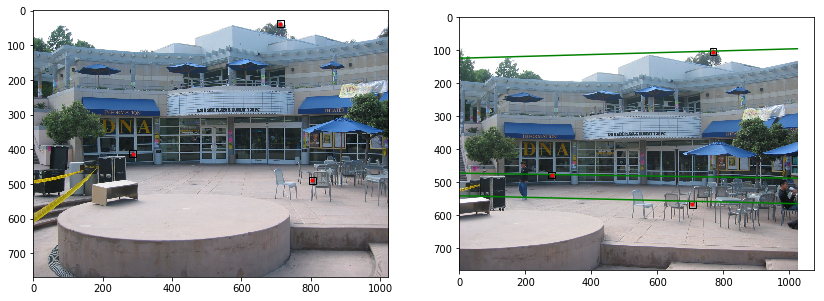

In [28]:
import random

#Sample 3 distinct points
pts1_out = set(range(pts1.shape[1])) - set(inliers)
idx = random.sample(pts1_out,3)
#Compute corresponding epipolar lines
l = F_LM.dot(toHomo(pts1[:,idx]))

# display the results
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
for i in range(3):
    x1 = pts1[0,idx[i]]
    x2 = pts2[0,idx[i]]
    y1 = pts1[1,idx[i]]
    y2 = pts2[1,idx[i]]
    k = -1.0*l[0,i]/l[1,i]
    x = np.linspace(0, I2.shape[1])
    y = k*x - 1.0*l[2,i]/l[1,i]
    ax1.plot(x1, y1,'.r')
    ax1.add_patch(patches.Rectangle((x1-20/2,y1-20/2),20,20, fill=False))
    ax2.plot(x, y,'-g')
    ax2.plot(x2, y2,'.r')
    ax2.add_patch(patches.Rectangle((x2-20/2,y2-20/2),20,20, fill=False))
plt.show()